In [10]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Create a connection to the database
cnx = sqlite3.connect('C:\\Users\\mayur\\Downloads\\database.sqlite')

# Load Player Attributes data
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

# Close the connection
cnx.close()

# Display the first few rows of the DataFrame
print(df.head())


   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [12]:
# Get info about the DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [13]:
# Check for missing values
print(df.isnull().sum())

# Dropping rows with missing values (for simplicity)
df = df.dropna()


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [17]:
features = [col for col in ['crossing', 'finishing', 'dribbling', 'preferred_foot', 'shooting', 'defending'] if col in df.columns]
X = df[features]

# # Selecting relevant features and the target variable
# features = ['crossing', 'finishing', 'dribbling', 'passing', 'shooting', 'defending']
# X = df[features]
y = df['overall_rating']


In [18]:
# Example: If you have 'preferred_foot' as a feature
X = pd.get_dummies(X, columns=['preferred_foot'], drop_first=True)


In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize the models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor()

# Train the models
linear_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [21]:
# Predict using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)


In [22]:
# Calculate MSE and RMSE for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
print(f'Linear Regression RMSE: {rmse_linear}')

# Calculate MSE and RMSE for Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print(f'Decision Tree RMSE: {rmse_tree}')


Linear Regression RMSE: 6.462913551105222
Decision Tree RMSE: 3.8462450604489025


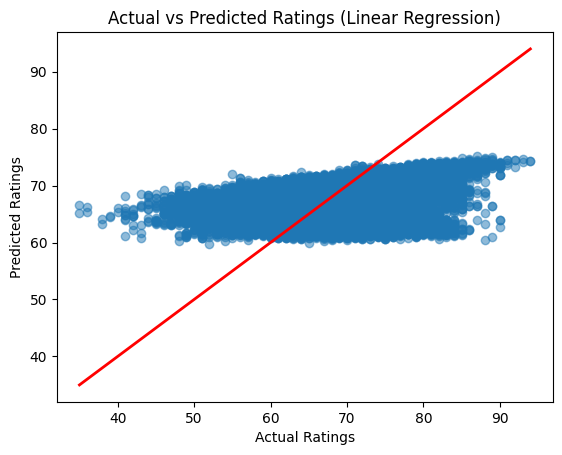

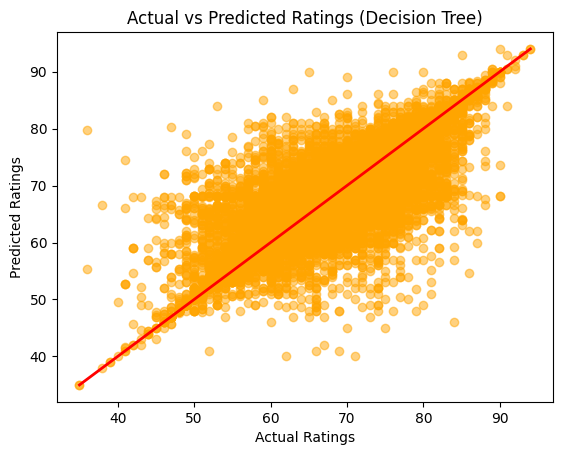

In [23]:
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

plt.scatter(y_test, y_pred_tree, alpha=0.5, color='orange')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()
